1、https://github.com/Tony607/Keras-Trigger-Word
2、https://blog.csdn.net/class_brick/article/details/82743741   https://www.jianshu.com/p/c34c885e58e7 语音特征MFCC提取过程详解
3、https://blog.csdn.net/zhuguorong11/article/details/77801977  使用短时傅里叶变换得到信号的频谱图。
4、https://www.sohu.com/a/224533027_99907714 傅里叶变换就是这么简单，你学会了吗? 
5、https://baike.baidu.com/item/%E9%A2%91%E8%B0%B1%E5%9B%BE/7709772?fr=aladdin 频谱图
6、https://bbs.csdn.net/wap/topics/16563 如何对声音波形进行频谱分析？
7、https://blog.csdn.net/lbaihao/article/details/81282440 语音波形，截断的频域输出以及语谱图制作
8、https://blog.csdn.net/zxf1769/article/details/86318271 与频谱有关的几个谱的概念（非常赞！初学者必看！）
9、https://www.cnblogs.com/h2zZhou/p/8405717.html 深入浅出的讲解傅里叶变换（真正的通俗易懂）
10、https://www.sohu.com/a/224533027_99907714 傅里叶变换就是这么简单，你学会了吗? 
11、https://blog.csdn.net/qq_27825451/article/details/88553441 使用python（scipy和numpy）实现快速傅里叶变换（FFT）最详细教程
12、https://blog.csdn.net/pipisorry/article/details/51050297 numpy教程：快速傅里叶变换模块numpy.fft 

In [ ]:
# 使用scipy包实现快速傅里叶变换
# 产生原始信号——原始信号是三个正弦波的叠加

import numpy as np
from scipy.fftpack import fft,ifft
import matplotlib.pyplot as plt
from matplotlib.pylab import mpl
 
mpl.rcParams['font.sans-serif'] = ['SimHei']   #显示中文
mpl.rcParams['axes.unicode_minus']=False       #显示负号
# 采样点选择1400个，因为设置的信号频率分量最高为600赫兹，根据采样定理知采样频率要大于信号频率2倍，所以这里设置采样频率
# 为1400赫兹（即一秒内有1400个采样点，一样意思的） # 在闭区间[2, 3]生成5个间隔相同的数字print(np.linspace(2.0, 3.0, num=5))# [2.   2.25 2.5  2.75 3.  ]
x = np.linspace(0,1,1400)      
# 设置需要采样的信号，频率分量有200，400和600 这里原始信号的三个正弦波的频率分别为，200Hz、400Hz、600Hz,
# 最大频率为600赫兹。根据采样定理，fs至少是600赫兹的2倍，这里选择1400赫兹，即在一秒内选择1400个点。
y = 7 * np.sin(2 * np.pi * 200 * x) + 5 * np.sin(2 * np.pi * 400 * x)+ 3 * np.sin(2 * np.pi * 600 * x)
# y = np.sin(x)
plt.figure()
plt.plot(x,y)   
plt.title('原始波形')
 
plt.figure()
plt.plot(x[0:50],y[0:50])   
plt.title('原始部分波形（前50组样本）')
plt.show()

1400
[-4.18864943e-12-0.j          9.66210986e-05-0.04305756j
  3.86508070e-04-0.08611996j  8.69732036e-04-0.12919206j
  1.54641157e-03-0.17227871j]


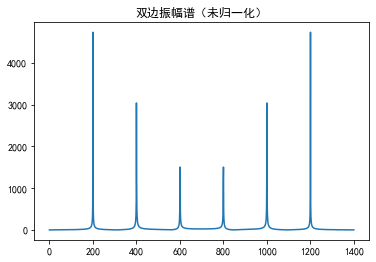

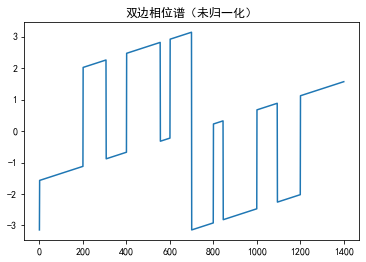

In [10]:
#  2、快速傅里叶变换
from scipy.fftpack import fft,ifft
fft_y=fft(y)                          #快速傅里叶变换
print(len(fft_y))
print(fft_y[0:5])
'''
我们发现以下几个特点：
1）变换之后的结果数据长度和原始采样信号是一样的
2）每一个变换之后的值是一个复数，为a+bj的形式，那这个复数是什么意思呢？
    我们知道，复数a+bj在坐标系中表示为（a,b），故而复数具有模和角度，我们都知道快速傅里叶变换具有“振幅谱”“相位谱”，它其实就是通过对快
    速傅里叶变换得到的复数结果进一步求出来的，
    那这个直接变换后的结果是不是就是我需要的，当然是需要的，在FFT中，得到的结果是复数，
3）FFT得到的复数的模（即绝对值）就是对应的“振幅谱”，复数所对应的角度，就是所对应的“相位谱”，现在可以画图了。
'''

# FFT的原始频谱
N=1400
x = np.arange(N)           # 频率个数
 
abs_y=np.abs(fft_y)                # 取复数的绝对值，即复数的模(双边频谱)
angle_y=np.angle(fft_y)              #取复数的角度
 
plt.figure()
plt.plot(x,abs_y)   
plt.title('双边振幅谱（未归一化）')
 
plt.figure()
plt.plot(x,angle_y)   
plt.title('双边相位谱（未归一化）')
plt.show()
